In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.utils import np_utils
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten ,Dropout
import tensorflow as tf
from keras.regularizers import l2
from keras import regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_normal, RandomNormal, Zeros
from sklearn.metrics import roc_auc_score, roc_curve, auc ,accuracy_score,precision_score,recall_score,f1_score,accuracy_score

In [12]:
image_size = 28
num_channels = 1
num_features = image_size * image_size * num_channels
num_classes = 10

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Train data shape: {}'.format(x_train.shape))
print('Test  data shape: {}'.format(x_test.shape))

Train data shape: (60000, 28, 28)
Test  data shape: (10000, 28, 28)


In [14]:
x_train = np.zeros((len(x_train), 32, 32, 1))
x_test = np.zeros((len(x_test), 32, 32, 1))

x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')


x_train /= 255.0

mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))
x_train = (x_train - mean) / std

x_test /= 255.0
x_test =(x_test-mean) / std

print(x_train.shape)
print(x_test.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [15]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [16]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
    )
datagen.fit(x_train)

In [17]:
# plotting helper function
def plothist(hist):
    
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')


    plt.show()

In [18]:
def create_cnn():
    model = Sequential()
    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same' , strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal() ,
                     input_shape=x_train.shape[1:]))
    model.add(BatchNormalization(momentum=0.05,trainable=True, epsilon=1e-05))# affine=True, track_running_stats=True
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))          


    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=RandomNormal(stddev=0.01)))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(128, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))


    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))

    # Conv Block 4
    model.add(Conv2D(512, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))

    # Conv Block 5
    model.add(Conv2D(2048, (1, 1), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)

    model.add(Conv2D(256, (1, 1), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)
     
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))# padding=0, dilation=(1, 1), ceil_mode=False)
    model.add(Dropout(0.1))


    # Conv Block 6
    model.add(Conv2D(256, (3, 3), padding='same',strides=(1, 1),kernel_regularizer=regularizers.l2(0.005), kernel_initializer=glorot_normal()))
    model.add(BatchNormalization(momentum=0.05, epsilon=1e-05))
    model.add(Activation(activation='relu'))#(inplace)


    # Classifier
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = create_cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       1

In [20]:
BATCH_SIZE =128
STEPS_PER_EPOCH =len(x_train)//BATCH_SIZE 

step = tf.Variable(0, trainable=False)
boundaries = [50*STEPS_PER_EPOCH,75*STEPS_PER_EPOCH,
              100*STEPS_PER_EPOCH]
values = [0.1, 0.01 , 0.001, 0.0001]
learning_rate_fn = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

In [25]:
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate_fn,momentum=0.9)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history =model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                   steps_per_epoch=len(x_train) // 128,epochs=30,
                   validation_data=(x_test,y_test))

Epoch 1/30
468/468 [==============================] - 43s 92ms/step - loss: nan - accuracy: 0.1090 - val_loss: nan - val_accuracy: 0.1135
Epoch 2/30
468/468 [==============================] - 43s 92ms/step - loss: nan - accuracy: 0.1082 - val_loss: nan - val_accuracy: 0.1010
Epoch 3/30
468/468 [==============================] - 43s 93ms/step - loss: nan - accuracy: 0.1079 - val_loss: nan - val_accuracy: 0.1135
Epoch 4/30
468/468 [==============================] - 44s 93ms/step - loss: nan - accuracy: 0.1073 - val_loss: nan - val_accuracy: 0.1135
Epoch 5/30
468/468 [==============================] - 44s 93ms/step - loss: nan - accuracy: 0.1081 - val_loss: nan - val_accuracy: 0.0980
Epoch 6/30
468/468 [==============================] - 44s 93ms/step - loss: nan - accuracy: 0.1085 - val_loss: nan - val_accuracy: 0.1135
Epoch 7/30
468/468 [==============================] - 44s 94ms/step - loss: nan - accuracy: 0.1086 - val_loss: nan - val_accuracy: 0.1135
Epoch 8/30
468/468 [==============

In [ ]:
#model.save('mnist.simplenet.h5')
                 
#model=load_model('mnist.simplenet.h5')

In [23]:
y_pred = model.predict(x_test)
labels1 = np.arange(num_classes)
print('Auc = %f' %  (roc_auc_score(y_test,  y_pred.round(),average='macro',multi_class='ovo',labels=labels1)))
print('f1_score = %f' % (f1_score(y_test, y_pred.round(), average="macro")))
print('precision = %f' % (precision_score(y_test, y_pred.round(), average="macro")))
print('recall  = %f' % (recall_score(y_test, y_pred.round(), average="macro")))
print('accuracy  = %f' % (accuracy_score(y_test, y_pred.round())))  

Auc = 0.500000
f1_score = 0.000000
precision = 0.000000
recall  = 0.000000
accuracy  = 0.000000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


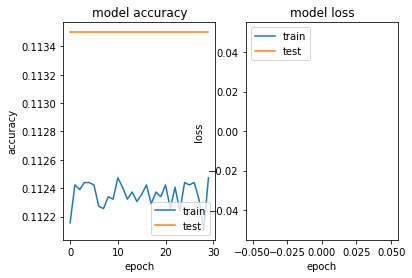

In [24]:
plothist(history)